In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("wine.csv")
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
data.shape

(178, 14)

In [5]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [6]:
data.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

# DUPLICATE ROWS

In [8]:
data[data.duplicated(keep=False)]

Empty DataFrame
Columns: [Type, Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline]
Index: []

# NULL VALUES

In [10]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

# VISUALIZATIONS

Type
2    71
1    59
3    48
Name: count, dtype: int64


<Axes: xlabel='Type'>

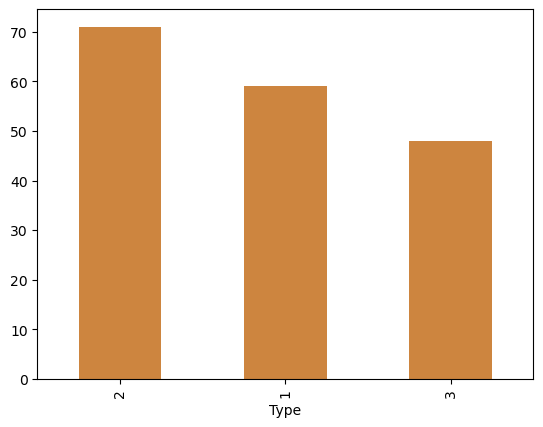

In [12]:
print(data["Type"].value_counts())
data["Type"].value_counts().plot(kind="bar",color="peru")

# FOR NUMERICAL COLUMNS

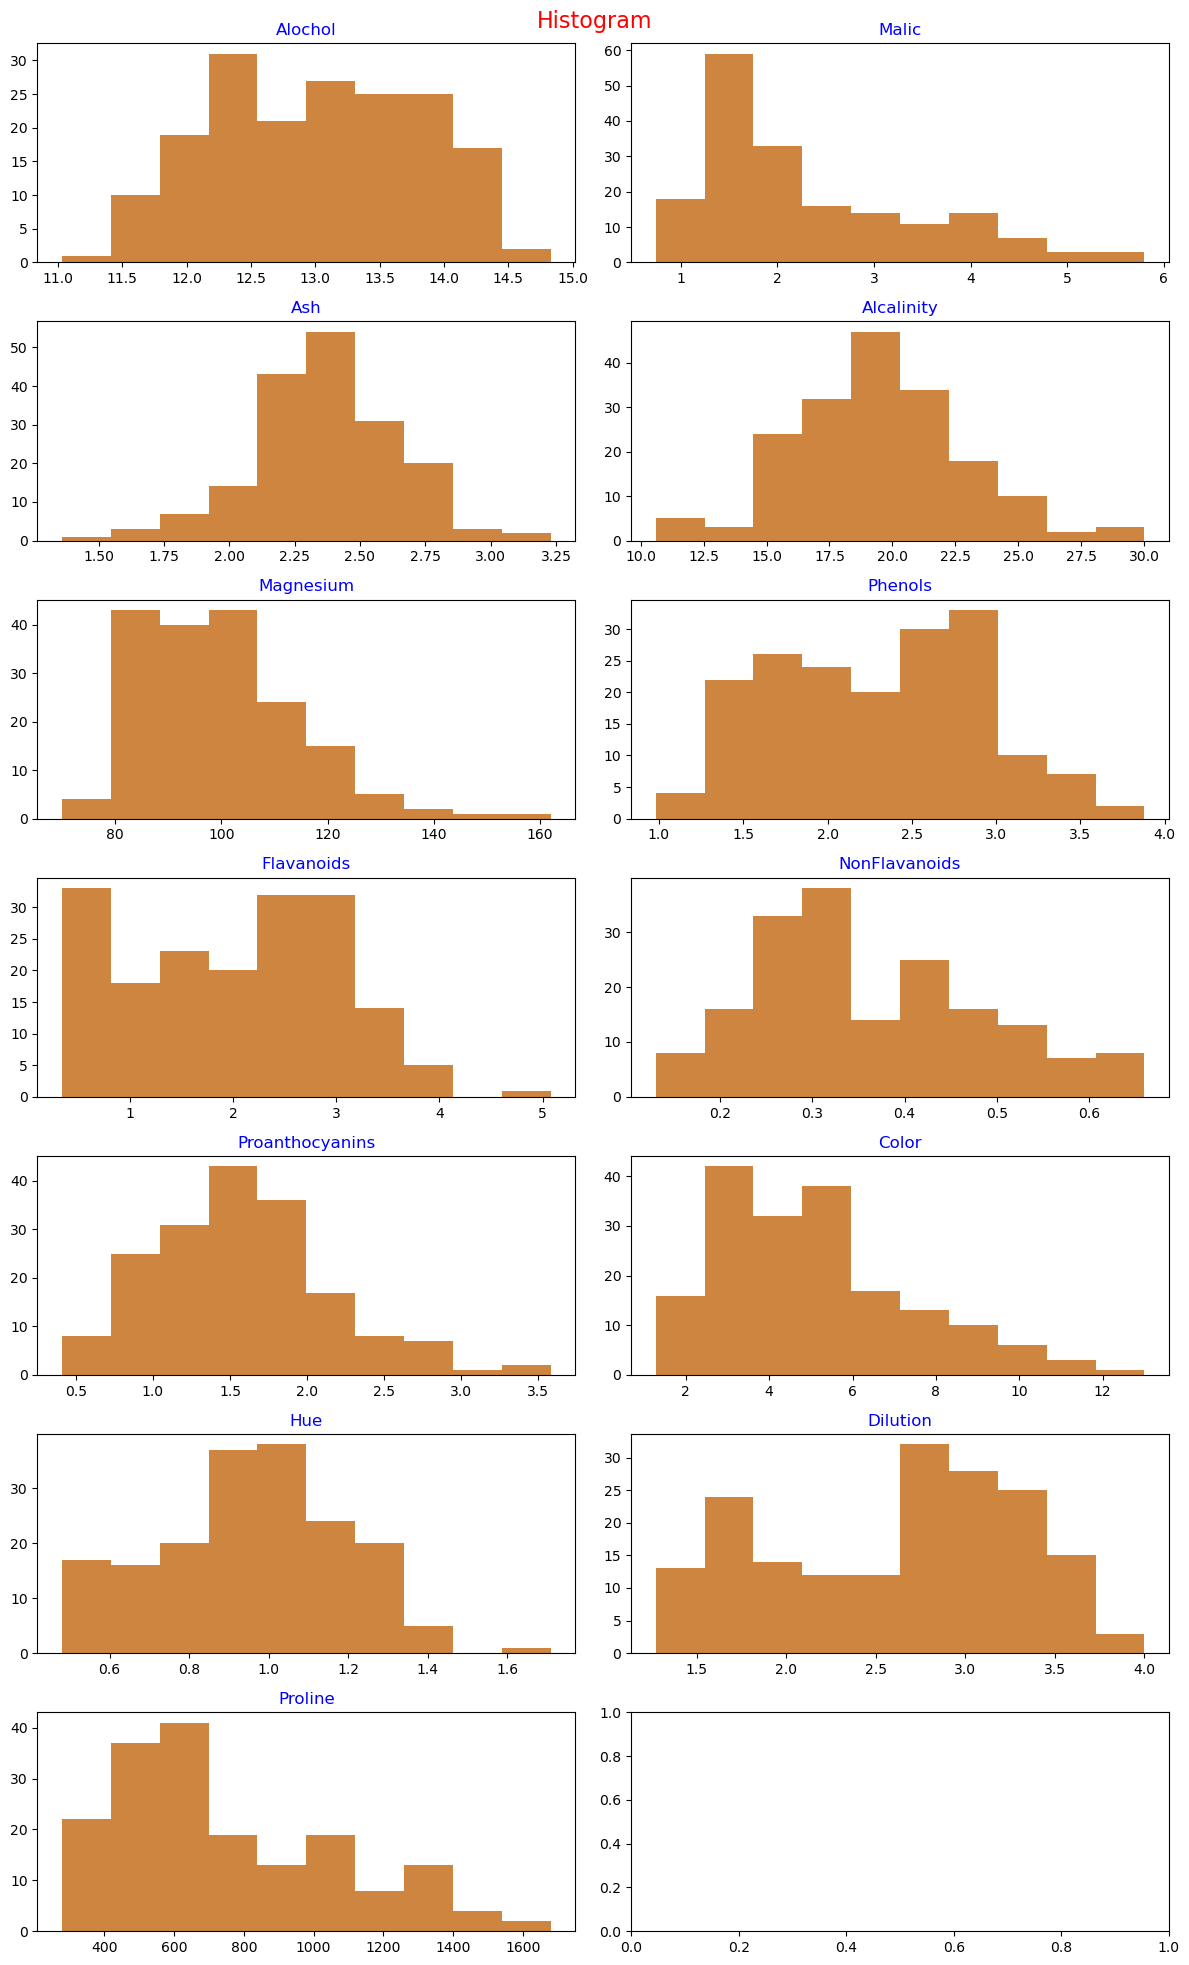

In [14]:
fig,ax=plt.subplots(nrows=7,ncols=2,figsize=(12,20))
plt.suptitle("Histogram",color="red",size=16)
ax[0,0].set_title("Alochol",color="blue")
ax[0,0].hist(data.Alcohol,color="peru")
ax[0,1].set_title("Malic",color="blue")
ax[0,1].hist(data.Malic,color="peru")
ax[1,0].set_title("Ash",color="blue")
ax[1,0].hist(data.Ash,color="peru")
ax[1,1].set_title("Alcalinity",color="blue")
ax[1,1].hist(data.Alcalinity,color="peru")
ax[2,0].set_title("Magnesium",color="blue")
ax[2,0].hist(data.Magnesium,color="peru")
ax[2,1].set_title("Phenols",color="blue")
ax[2,1].hist(data.Phenols,color="peru")
ax[3,0].set_title("Flavanoids",color="blue")
ax[3,0].hist(data.Flavanoids,color="peru")
ax[3,1].set_title("NonFlavanoids",color="blue")
ax[3,1].hist(data.Nonflavanoids,color="peru")
ax[4,0].set_title("Proanthocyanins",color="blue")
ax[4,0].hist(data.Proanthocyanins,color="peru")
ax[4,1].set_title("Color",color="blue")
ax[4,1].hist(data.Color,color="peru")
ax[5,0].set_title("Hue",color="blue")
ax[5,0].hist(data.Hue,color="peru")
ax[5,1].set_title("Dilution",color="blue")
ax[5,1].hist(data.Dilution,color="peru")
ax[6,0].set_title("Proline",color="blue")
ax[6,0].hist(data.Proline,color="peru")
plt.tight_layout()
plt.show()

# BOX PLOTS

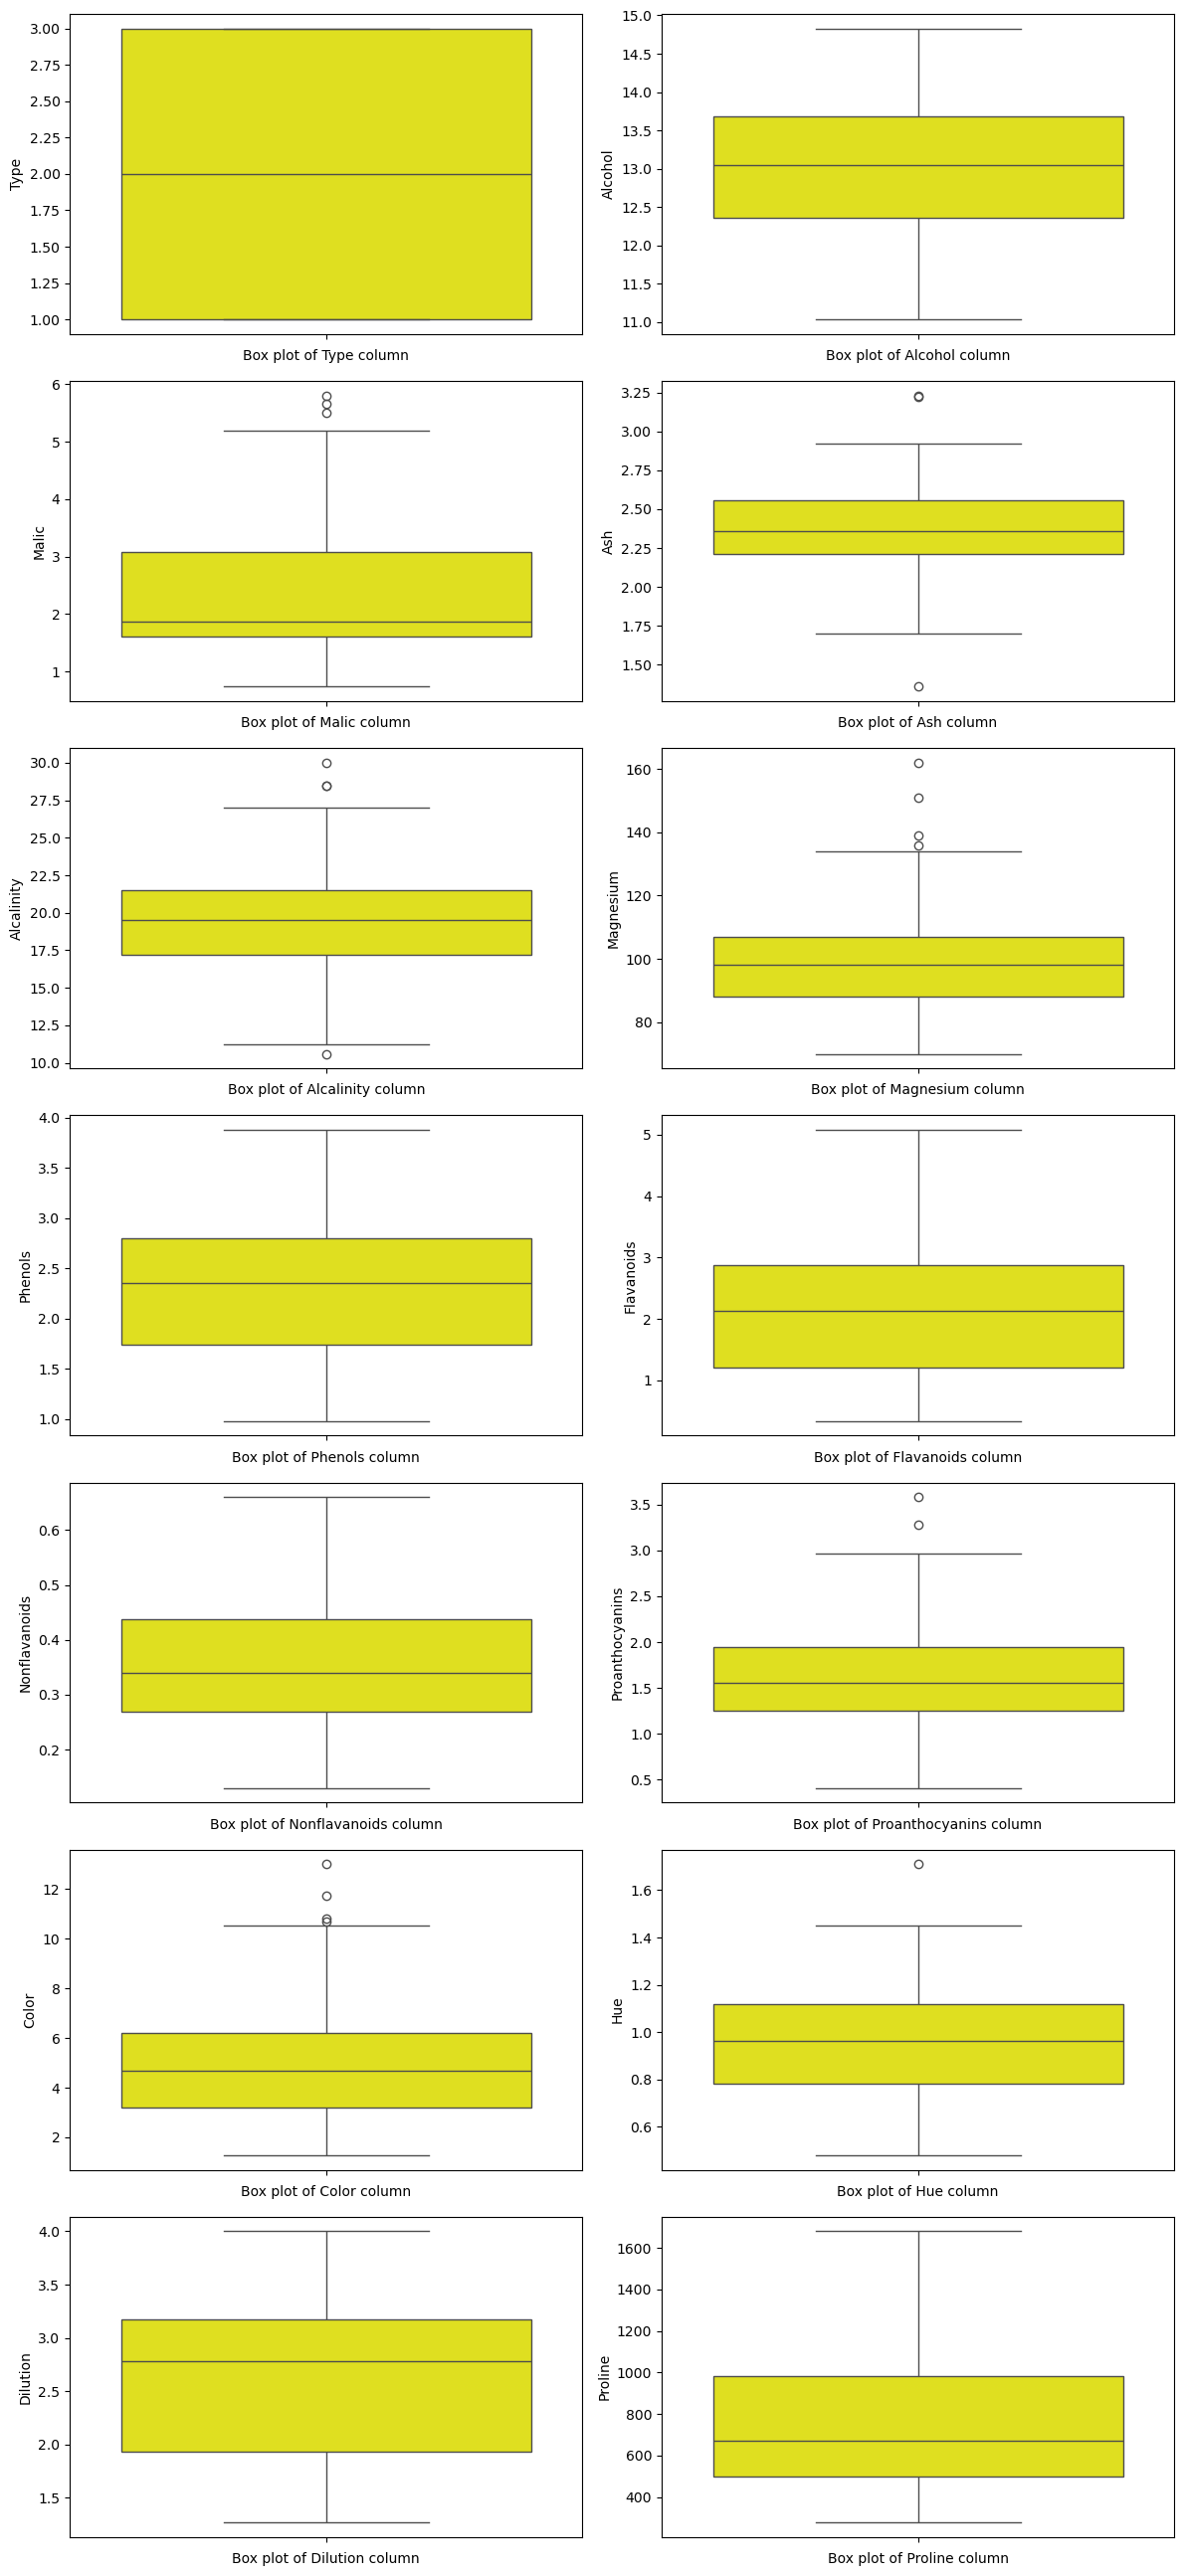

In [16]:
plt.figure(figsize=(12,26))
for i,column in enumerate(data.columns,1):
    plt.subplot(7,2,i)
    sns.boxplot(data[column],color="yellow")
    plt.xlabel(f"Box plot of {column} column")
    plt.tight_layout()

# CORRELATION MATRIX

In [18]:
corr_matrix=data.corr()
corr_matrix

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Proline         -0.633717  0.643720 -0.192011  0.223626   -0.440597   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.209179 -0.719163   -0.847498       0.489109   
Alcohol           0.270798  0.289101    0.236815      -0.155929   
Malic            -0.054575 -0.335167   -0.411007       0.292977   
Ash               0.286587  0.128980    0.115077       0.186230   
Alcalinity       -0.083333 -0.321113   -0.351370       0.361922   
Magnesium         1.000000  0.214401    0.195784      -0.256294   
Phenols           0.214401  1.000000    0.864564      -0.449935   
Flavanoids        0.195784  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.256294 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.236441  0.612413    0.652692      -0.365845   
Color             0.199950 -0.055136   -0.172379       0.139057   
Hue               0.055398  0.433681    0.543479      -0.262640   
Dilution          0.066004  0.699949    0.787194      -0.503270   
Proline           0.393351  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.499130  0.265668 -0.617369 -0.788230 -0.633717  
Alcohol                 0.136698  0.546364 -0.071747  0.072343  0.643720  
Malic                  -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
Ash                     0.009652  0.258887 -0.074667  0.003911  0.223626  
Alcalinity             -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
Magnesium               0.236441  0.199950  0.055398  0.066004  0.393351  
Phenols                 0.612413 -0.055136  0.433681  0.699949  0.498115  
Flavanoids              0.652692 -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids          -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.025250  0.295544  0.519067  0.330417  
Color                  -0.025250  1.000000 -0.521813 -0.428815  0.316100  
Hue                     0.295544 -0.521813  1.000000  0.565468  0.236183  
Dilution                0.519067 -0.428815  0.565468  1.000000  0.312761  
Proline                 0.330417  0.316100  0.236183  0.312761  1.000000

# Phenols and Flavanoids are correlated each other
# Dilution and Flavonoids also related to each other

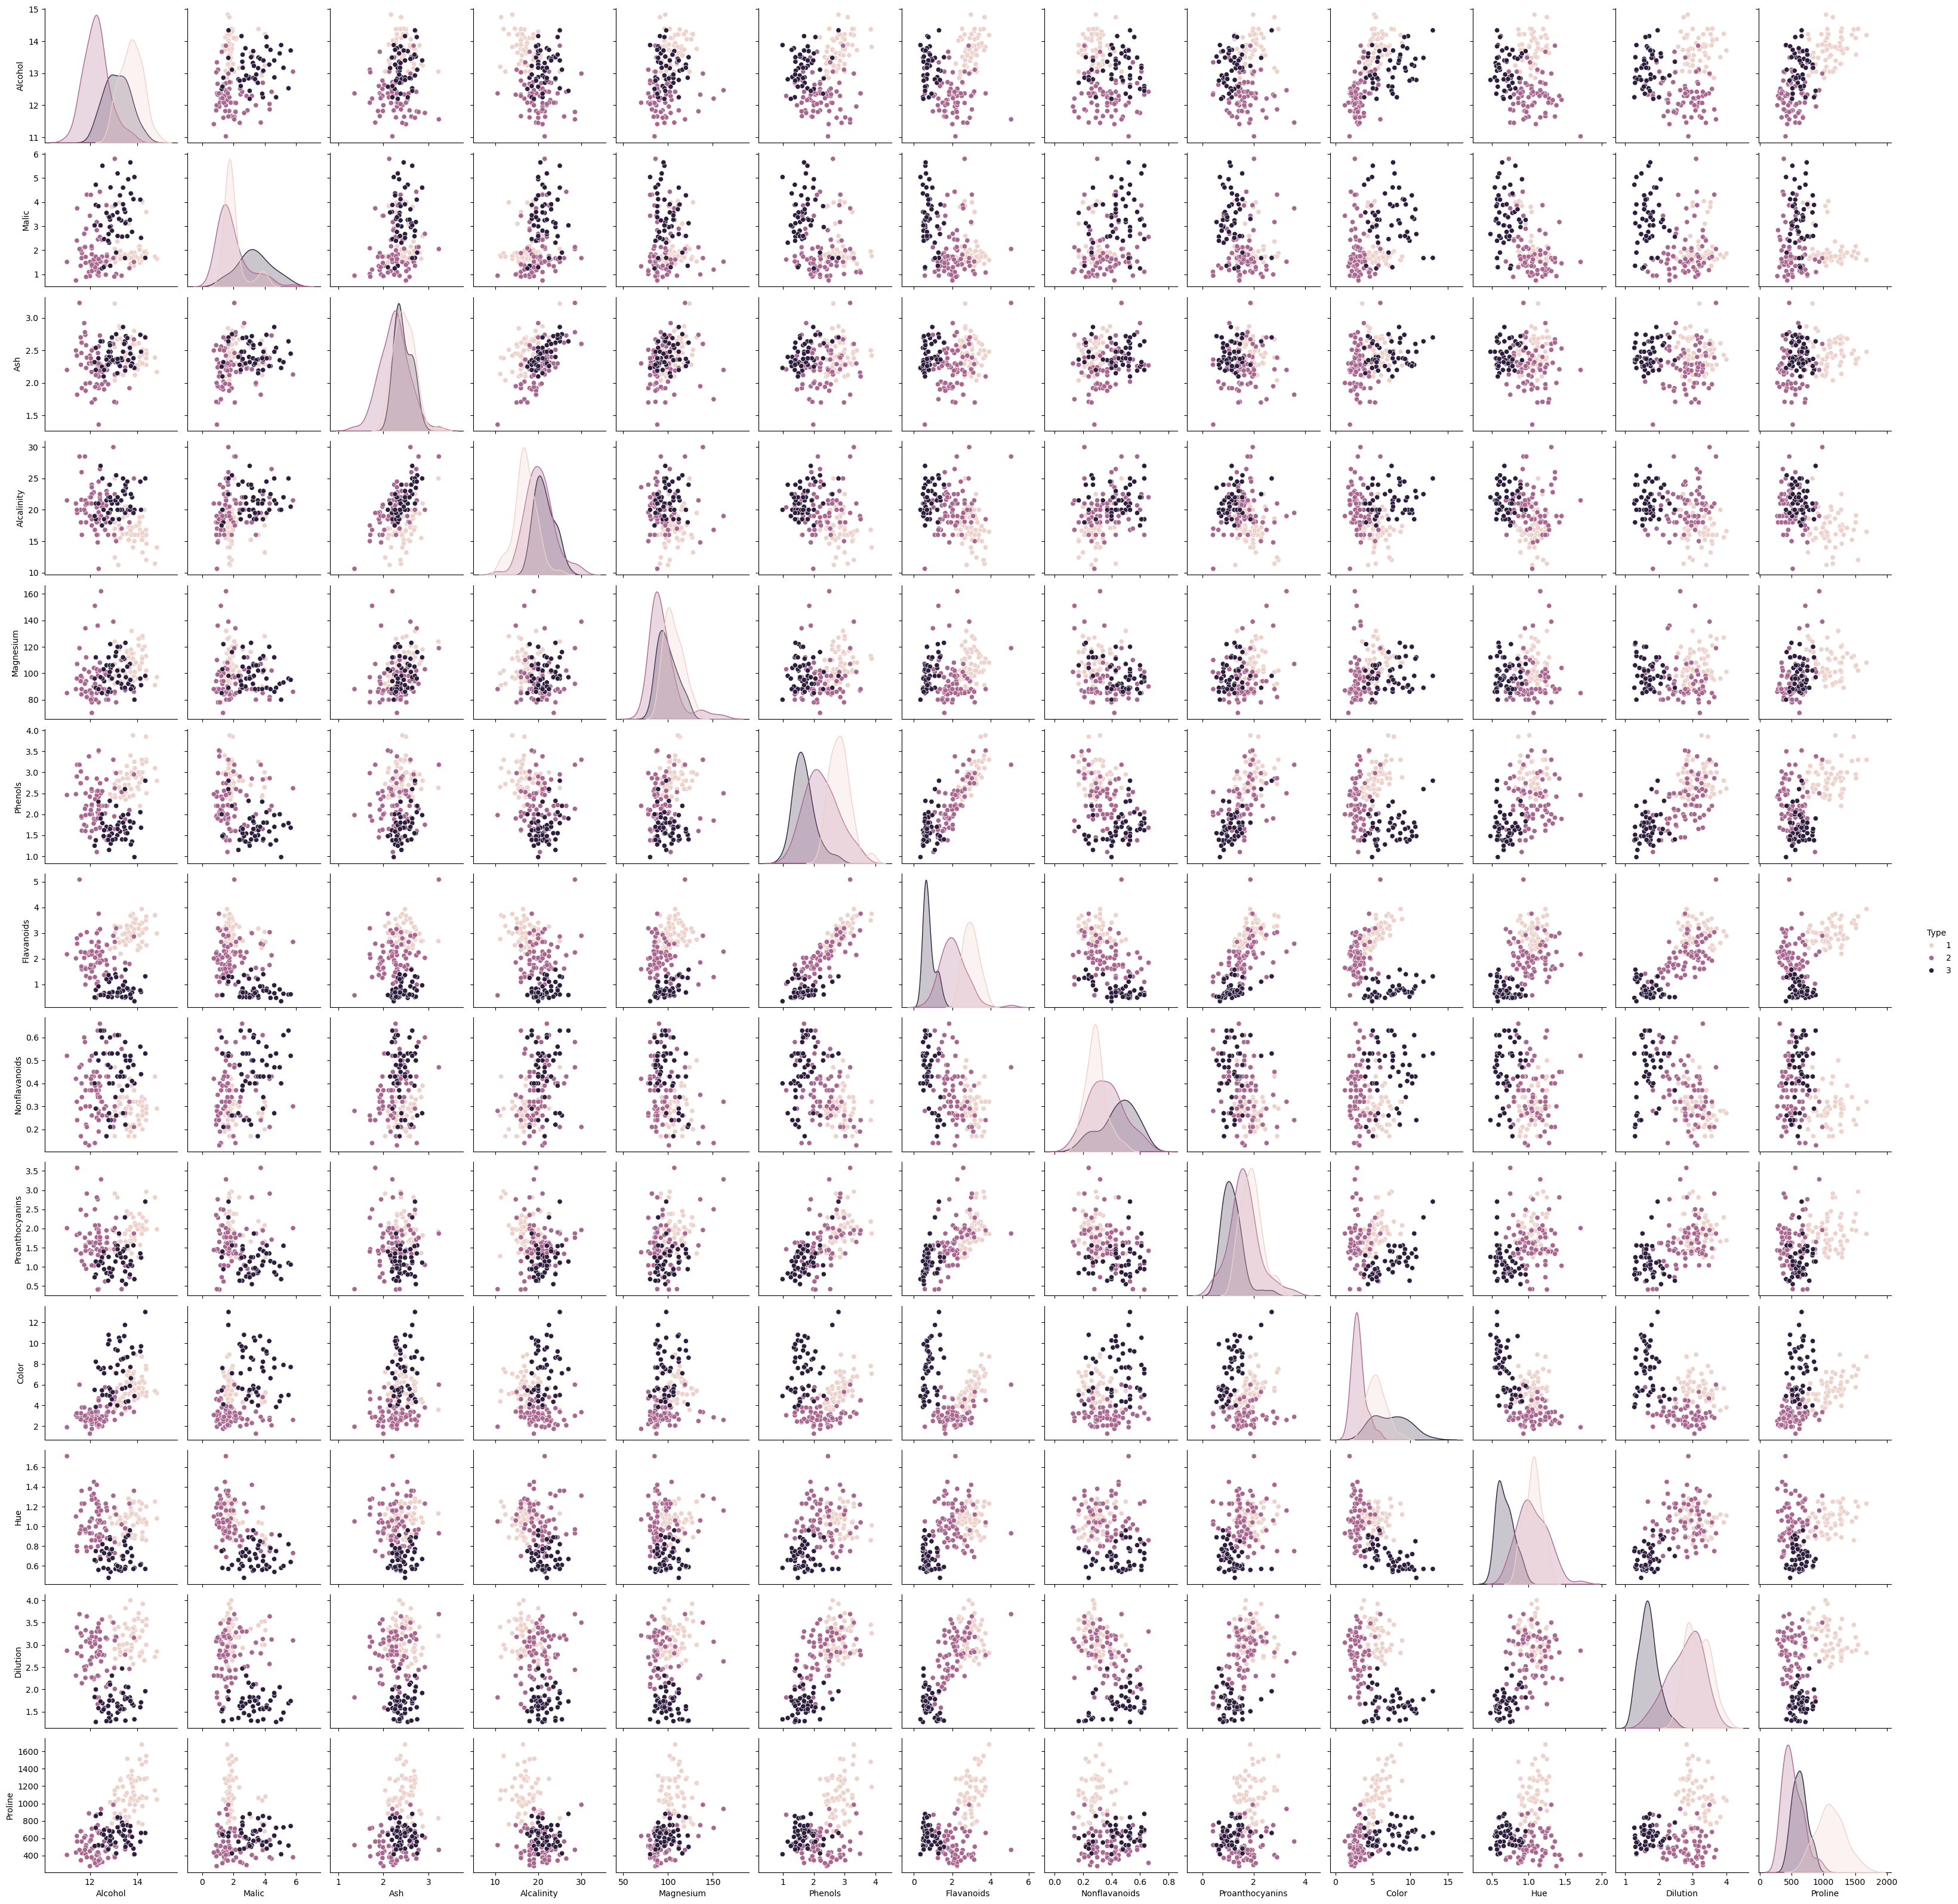

In [20]:
sns.pairplot(data,hue='Type')

# Standardize the data

In [22]:
standard=StandardScaler()
std_data=standard.fit_transform(data)
std_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA

In [24]:
from sklearn.decomposition import PCA

In [25]:
cols=[]
for i in range(1,15):
    cols.append(f"PC{i}")

In [26]:
pca=PCA()
pca_components=pca.fit_transform(std_data)
pca_components=pd.DataFrame(pca_components,columns=cols)
pca_components

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -3.522934 -1.453098 -0.164795 -0.013273  0.737345 -0.300716  0.573876   
1   -2.528858  0.330019 -2.026707 -0.417144 -0.283214 -0.884309 -0.029716   
2   -2.785029 -1.036936  0.983238  0.664232 -0.387565  0.468842  0.488305   
3   -3.922588 -2.768210 -0.174968  0.565088 -0.324360  0.262616 -0.398364   
4   -1.407511 -0.867773  2.025829 -0.440906  0.227949 -0.593762  0.447876   
..        ...       ...       ...       ...       ...       ...       ...   
173  3.627996 -2.206617 -0.343668  0.751705 -1.004109 -1.143155  0.843455   
174  2.942729 -1.752263  0.207480  0.399381  0.154223 -0.062465  0.139947   
175  3.027272 -2.756040 -0.940803  0.607758  1.128136  0.005290  0.733026   
176  2.755222 -2.293784 -0.550474 -0.391570  1.067083  1.012562  0.755423   
177  3.496336 -2.760608  1.013151  0.349630 -1.005136  0.377223  0.015307   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  
0    0.055637 -0.458765  1.065570 -0.420494  0.552928 -0.302978  0.200857  
1    1.010372  0.218806 -0.020182 -0.130020  0.394971 -0.146645  0.126402  
2   -0.268957  1.222769 -0.106249 -0.279074  0.001898  0.021278 -0.055752  
3    0.618844 -0.114658  0.107671  0.773866 -0.230929 -0.501277  0.019903  
4    0.434937 -0.261548  0.112434 -0.537931 -0.226686  0.274109 -0.517498  
..        ...       ...       ...       ...       ...       ...       ...  
173 -0.206626 -0.125419 -0.392619  0.136783  0.174807 -0.198803  0.093951  
174 -0.565588  0.055341 -0.236267  0.254286 -0.277519 -0.185064 -0.024277  
175  0.052545 -0.027881 -0.212749  0.502640  0.693336  0.167036 -0.031696  
176  0.426512  0.048784  0.479793  0.313786  0.344120 -0.109515  0.102823  
177 -0.325002 -0.719983  0.079908 -0.238282 -0.189866 -0.164090 -0.264917  

[178 rows x 14 columns]

# Weights

In [28]:
weights=pd.DataFrame(pca.components_)
weights.index=cols
weights.columns=data.columns
weights

Type   Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
PC1   0.393670 -0.136325  0.222676 -0.002258    0.224298  -0.124630 -0.359264   
PC2  -0.005690 -0.484161 -0.223591 -0.315856    0.011616  -0.300551 -0.067120   
PC3   0.001218 -0.207401  0.088796  0.626102    0.611990   0.130985  0.146508   
PC4   0.122464 -0.081918  0.469888 -0.249841    0.071993  -0.163214  0.190985   
PC5   0.157584 -0.250894 -0.188600 -0.093524    0.046567   0.778330 -0.144666   
PC6   0.200339 -0.135171 -0.598419 -0.108000    0.088112  -0.144838  0.148097   
PC7  -0.059382 -0.092699  0.374370 -0.167089   -0.268725   0.329580 -0.037898   
PC8  -0.071796 -0.421544 -0.087576  0.172080   -0.413249   0.148812  0.363439   
PC9  -0.162369 -0.450191 -0.006026  0.262494   -0.118633  -0.252536 -0.406374   
PC10 -0.198994  0.311280 -0.325924 -0.124523    0.157168   0.127734 -0.307723   
PC11  0.014442 -0.221546  0.068393 -0.494524    0.474617   0.071197  0.297410   
PC12  0.015758 -0.264113  0.119212 -0.045023   -0.061313   0.061161 -0.300876   
PC13 -0.492243 -0.056106  0.066755 -0.192018    0.200078   0.058299 -0.359527   
PC14  0.669045  0.090626 -0.025225 -0.001636   -0.095361   0.022301 -0.253038   

      Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  \
PC1    -0.390712       0.267001        -0.279063  0.089318 -0.276823   
PC2     0.001313      -0.026989        -0.041223 -0.529783  0.277907   
PC3     0.150963       0.169976         0.149880 -0.137266  0.085329   
PC4     0.144617      -0.328013         0.462758  0.072112 -0.434666   
PC5    -0.112006      -0.432579         0.091588 -0.046270 -0.029867   
PC6     0.062473       0.258686         0.466278  0.425255 -0.015651   
PC7    -0.067732       0.611112         0.422923 -0.186136  0.192041   
PC8     0.175405       0.230751        -0.343739  0.040696 -0.483626   
PC9    -0.090919      -0.159123         0.265787 -0.075265 -0.212417   
PC10   -0.140440       0.240543         0.108696 -0.217043 -0.509661   
PC11   -0.032192       0.122010        -0.232924  0.019724 -0.061405   
PC12   -0.050014       0.042666        -0.093343  0.597954  0.257743   
PC13    0.598343       0.064040        -0.110135  0.159178 -0.049231   
PC14    0.601909       0.082231        -0.058642 -0.178821 -0.022583   

      Dilution   Proline  
PC1  -0.350526 -0.269515  
PC2   0.162776 -0.366059  
PC3   0.166204 -0.126687  
PC4   0.156723 -0.255795  
PC5  -0.144194 -0.084408  
PC6  -0.217704 -0.066565  
PC7  -0.078510  0.054204  
PC8   0.068651 -0.111467  
PC9  -0.084265  0.544905  
PC10  0.455705 -0.046208  
PC11  0.066462  0.551308  
PC12  0.611092 -0.072680  
PC13 -0.329420 -0.173229  
PC14  0.135092  0.216044

# Variances

In [30]:
variances=pca_components.var()
variances=pd.DataFrame(variances,columns=["variance"])
variances

variance
PC1   5.567225
PC2   2.511184
PC3   1.454244
PC4   0.933160
PC5   0.882460
PC6   0.676579
PC7   0.556928
PC8   0.352012
PC9   0.296206
PC10  0.263788
PC11  0.227124
PC12  0.169750
PC13  0.130296
PC14  0.058139

In [31]:
percent_variance=(pca_components.var()/np.sum(pca_components.var())) * 100
percent_variance

PC1     39.542486
PC2     17.836259
PC3     10.329102
PC4      6.627984
PC5      6.267875
PC6      4.805560
PC7      3.955707
PC8      2.500244
PC9      2.103871
PC10     1.873615
PC11     1.613203
PC12     1.205691
PC13     0.925458
PC14     0.412945
dtype: float64

# By using model

In [33]:
pca.explained_variance_

array([5.56722458, 2.51118402, 1.45424413, 0.9331603 , 0.88246016,
       0.67657935, 0.55692777, 0.35201176, 0.29620602, 0.26378805,
       0.2271244 , 0.16975037, 0.13029618, 0.05813894])

In [34]:
pca.explained_variance_ratio_ * 100

array([39.54248599, 17.83625891, 10.32910159,  6.62798449,  6.26787513,
        4.80555958,  3.95570684,  2.50024407,  2.10387101,  1.87361499,
        1.61320301,  1.20569082,  0.92545842,  0.41294515])

In [35]:
cumsum=np.cumsum(percent_variance)
variances["percentage"]=percent_variance
variances["Cumsum"]=cumsum
variances

variance  percentage      Cumsum
PC1   5.567225   39.542486   39.542486
PC2   2.511184   17.836259   57.378745
PC3   1.454244   10.329102   67.707846
PC4   0.933160    6.627984   74.335831
PC5   0.882460    6.267875   80.603706
PC6   0.676579    4.805560   85.409266
PC7   0.556928    3.955707   89.364973
PC8   0.352012    2.500244   91.865217
PC9   0.296206    2.103871   93.969088
PC10  0.263788    1.873615   95.842703
PC11  0.227124    1.613203   97.455906
PC12  0.169750    1.205691   98.661596
PC13  0.130296    0.925458   99.587055
PC14  0.058139    0.412945  100.000000

# upto PC7 it has 90% of information

In [37]:
pca_data=pca_components.iloc[:,:7]
pca_data

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0   -3.522934 -1.453098 -0.164795 -0.013273  0.737345 -0.300716  0.573876
1   -2.528858  0.330019 -2.026707 -0.417144 -0.283214 -0.884309 -0.029716
2   -2.785029 -1.036936  0.983238  0.664232 -0.387565  0.468842  0.488305
3   -3.922588 -2.768210 -0.174968  0.565088 -0.324360  0.262616 -0.398364
4   -1.407511 -0.867773  2.025829 -0.440906  0.227949 -0.593762  0.447876
..        ...       ...       ...       ...       ...       ...       ...
173  3.627996 -2.206617 -0.343668  0.751705 -1.004109 -1.143155  0.843455
174  2.942729 -1.752263  0.207480  0.399381  0.154223 -0.062465  0.139947
175  3.027272 -2.756040 -0.940803  0.607758  1.128136  0.005290  0.733026
176  2.755222 -2.293784 -0.550474 -0.391570  1.067083  1.012562  0.755423
177  3.496336 -2.760608  1.013151  0.349630 -1.005136  0.377223  0.015307

[178 rows x 7 columns]

# Clustering to Original Data:

# KMEANS

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For Different K-values

In [42]:
k_values=list(range(2,11))

In [43]:
for i in k_values:
    k=KMeans(n_clusters=i,n_init=10)
    k.fit(data)
    labels=pd.Series(k.labels_)
    print("K is:",i)
    print(labels.value_counts())
    print(silhouette_score(data,labels))

C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K is: 2
0    123
1     55
Name: count, dtype: int64
0.6568490946514269


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K is: 3
1    69
2    62
0    47
Name: count, dtype: int64
0.5711220218931753


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K is: 4
0    66
3    57
2    32
1    23
Name: count, dtype: int64
0.562013637082329


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K is: 5
1    57
3    48
4    27
2    26
0    20
Name: count, dtype: int64
0.548969124044004


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K is: 6
3    57
0    48
4    26
2    24
1    17
5     6
Name: count, dtype: int64
0.5656105961617423


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K is: 7
3    43
0    41
4    28
5    24
2    19
6    17
1     6
Name: count, dtype: int64
0.5621273004049295


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K is: 8
2    31
0    30
7    28
4    26
5    24
1    17
3    16
6     6
Name: count, dtype: int64
0.5406178977066923


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K is: 9
4    31
7    30
0    28
2    26
3    17
6    16
1    14
8    10
5     6
Name: count, dtype: int64
0.5286608434469782


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K is: 10
4    34
2    26
8    24
0    20
9    17
6    16
5    14
7    11
1    10
3     6
Name: count, dtype: int64
0.5046357898256162


In [44]:
inertia=[]
for i in k_values:
    K=KMeans(n_clusters=i,n_init=10)
    K.fit(data)
    inertia.append(K.inertia_)
pd.DataFrame({"K_Value":k_values,"Inertia":inertia})

C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

K_Value       Inertia
0        2  4.543801e+06
1        3  2.370742e+06
2        4  1.333194e+06
3        5  9.164242e+05
4        6  6.814016e+05
5        7  4.147969e+05
6        8  3.232565e+05
7        9  2.711332e+05
8       10  2.196609e+05

Text(0.5, 1.0, 'Elbow Plot|Scree Plot')

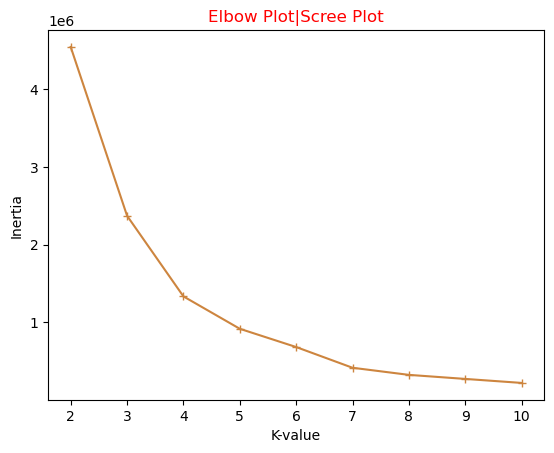

In [45]:
plt.plot(k_values,inertia,marker="+",color="peru")
plt.xlabel("K-value")
plt.ylabel("Inertia")
plt.title("Elbow Plot|Scree Plot",color="red")


# At K=3 ,we find the Elbow Shape

In [47]:
kmeans=KMeans(n_clusters=3,n_init=10)
kmeans.fit(data)
kmeans.labels_

C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

# Adding labels to data

In [49]:
kmeans_data=data.copy()
kmeans_data["labels"]=kmeans.labels_
kmeans_data

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  labels  
0             0.28             2.29   5.64  1.04      3.92     1065       1  
1             0.26             1.28   4.38  1.05      3.40     1050       1  
2             0.30             2.81   5.68  1.03      3.17     1185       1  
3             0.24             2.18   7.80  0.86      3.45     1480       1  
4             0.39             1.82   4.32  1.04      2.93      735       2  
..             ...              ...    ...   ...       ...      ...     ...  
173           0.52             1.06   7.70  0.64      1.74      740       2  
174           0.43             1.41   7.30  0.70      1.56      750       2  
175           0.43             1.35  10.20  0.59      1.56      835       2  
176           0.53             1.46   9.30  0.60      1.62      840       2  
177           0.56             1.35   9.20  0.61      1.60      560       0  

[178 rows x 15 columns]

In [50]:
kmeans_data.sort_values("labels")

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   
110     2    11.46   3.74  1.82        19.5        107     3.18        2.58   
108     2    12.22   1.29  1.94        19.0         92     2.36        2.04   
107     2    12.72   1.75  2.28        22.5         84     1.38        1.76   
106     2    12.25   1.73  2.12        19.0         80     1.65        2.03   
..    ...      ...    ...   ...         ...        ...      ...         ...   
35      1    13.48   1.81  2.41        20.5        100     2.70        2.98   
36      1    13.28   1.64  2.84        15.5        110     2.60        2.68   
109     2    11.61   1.35  2.70        20.0         94     2.74        2.92   
40      1    13.56   1.71  2.31        16.2        117     3.15        3.29   
88      2    11.64   2.06  2.46        21.6         84     1.95        1.69   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  labels  
177           0.56             1.35   9.20  0.61      1.60      560       0  
110           0.24             3.58   2.90  0.75      2.81      562       0  
108           0.39             2.08   2.70  0.86      3.02      312       0  
107           0.48             1.63   3.30  0.88      2.42      488       0  
106           0.37             1.63   3.40  1.00      3.17      510       0  
..             ...              ...    ...   ...       ...      ...     ...  
35            0.26             1.86   5.10  1.04      3.47      920       2  
36            0.34             1.36   4.60  1.09      2.78      880       2  
109           0.29             2.49   2.65  0.96      3.26      680       2  
40            0.34             2.34   6.13  0.95      3.38      795       2  
88            0.48             1.35   2.80  1.00      2.75      680       2  

[178 rows x 15 columns]

In [51]:
kmeans_data.labels.value_counts()

labels
0    69
2    62
1    47
Name: count, dtype: int64

In [52]:
kmeans_data.groupby("labels").mean()

Type    Alcohol     Malic       Ash  Alcalinity   Magnesium  \
labels                                                                    
0       2.275362  12.516667  2.494203  2.288551   20.823188   92.347826   
1       1.021277  13.804468  1.883404  2.426170   17.023404  105.510638   
2       2.258065  12.929839  2.504032  2.408065   19.890323  103.596774   

         Phenols  Flavanoids  Nonflavanoids  Proanthocyanins     Color  \
labels                                                                   
0       2.070725    1.758406       0.390145         1.451884  4.086957   
1       2.867234    3.014255       0.285319         1.910426  5.702553   
2       2.111129    1.584032       0.388387         1.503387  5.650323   

             Hue  Dilution      Proline  
labels                                   
0       0.941159  2.490725   458.231884  
1       1.078298  3.114043  1195.148936  
2       0.883968  2.365484   728.338710

# Cluster Analysis
# Low magnesium and proline and color belongs to one cluster
# Low malic and Nonflavanoids and High alcohol and Flavanoids and Hue and Proline belongs to one cluster
# Low Flavanoids and Hue and Dilution and High malic belongs to another cluster

In [54]:
kmeans_ss=silhouette_score(data,kmeans.labels_)
kmeans_ss

0.5711220218931753

# Clusters Visualization Using TSNE

In [60]:
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

In [61]:
tsne_data=TSNE(n_components=2)
tsne_data=tsne_data.fit_transform(data)
pd.DataFrame(tsne_data)

0         1
0    11.268605 -0.898103
1    10.928603 -0.766113
2    13.487426 -0.587882
3    16.301592 -0.876497
4     2.689792 -0.384767
..         ...       ...
173   2.689941  0.038150
174   3.111680 -0.025832
175   5.694454 -0.321172
176   5.855436 -0.433018
177  -6.356548  0.090759

[178 rows x 2 columns]

# WITHOUT CLUSTERS OF ORIGINAL DATASET

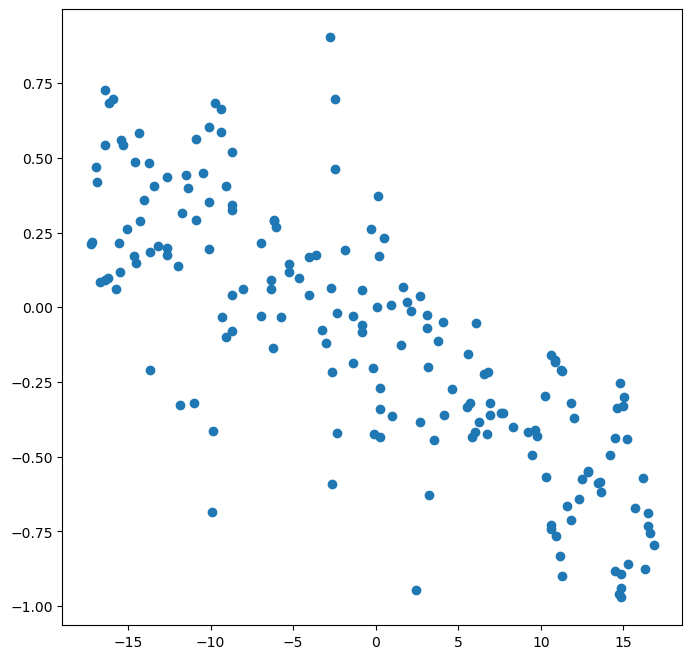

In [63]:
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:,0],tsne_data[:,1])

# WITH CLUSTERS OF ORIGINAL DATASET

In [68]:
colorclass=kmeans_data["labels"].to_numpy()
cluster.tsneplot(score=tsne_data,colorlist=colorclass,legendpos="best",figname="tsne_data")

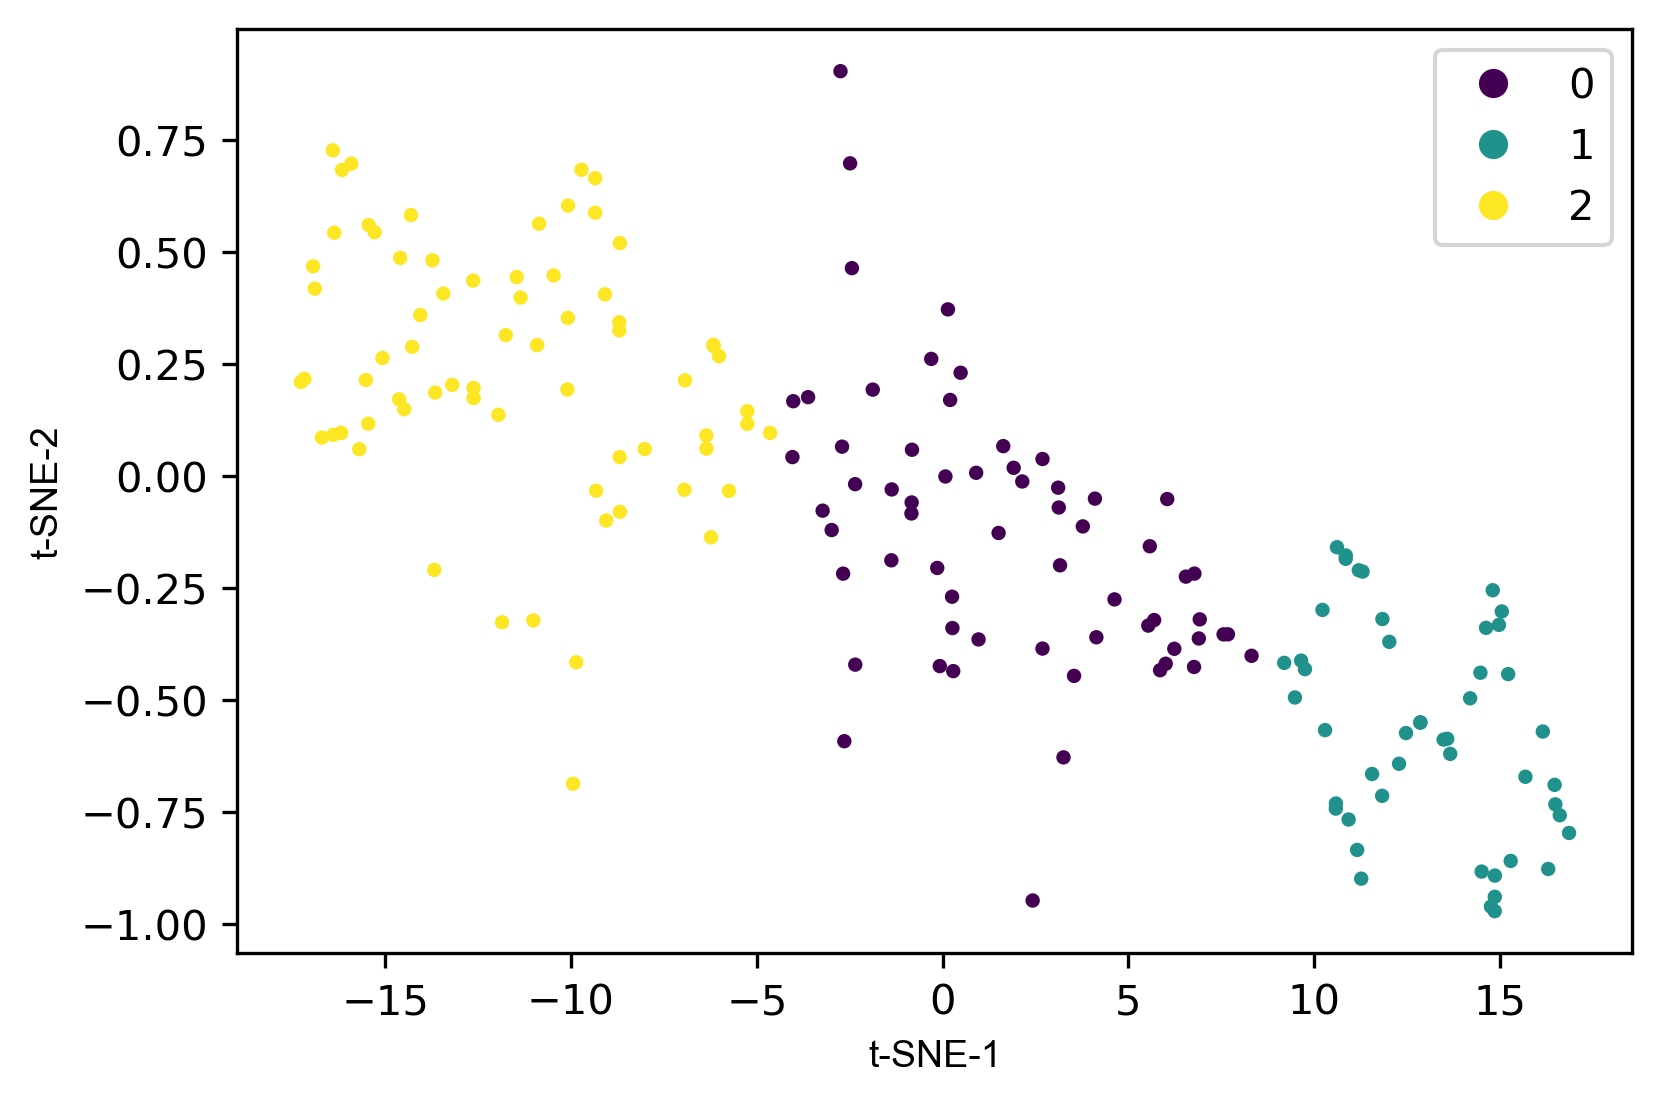

# Clustering to PCA Data

In [72]:
pca_data

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0   -3.522934 -1.453098 -0.164795 -0.013273  0.737345 -0.300716  0.573876
1   -2.528858  0.330019 -2.026707 -0.417144 -0.283214 -0.884309 -0.029716
2   -2.785029 -1.036936  0.983238  0.664232 -0.387565  0.468842  0.488305
3   -3.922588 -2.768210 -0.174968  0.565088 -0.324360  0.262616 -0.398364
4   -1.407511 -0.867773  2.025829 -0.440906  0.227949 -0.593762  0.447876
..        ...       ...       ...       ...       ...       ...       ...
173  3.627996 -2.206617 -0.343668  0.751705 -1.004109 -1.143155  0.843455
174  2.942729 -1.752263  0.207480  0.399381  0.154223 -0.062465  0.139947
175  3.027272 -2.756040 -0.940803  0.607758  1.128136  0.005290  0.733026
176  2.755222 -2.293784 -0.550474 -0.391570  1.067083  1.012562  0.755423
177  3.496336 -2.760608  1.013151  0.349630 -1.005136  0.377223  0.015307

[178 rows x 7 columns]

# KMeans for PC's

In [75]:
for i in k_values:
    k=KMeans(n_clusters=i,n_init=10)
    k.fit(pca_data)
    labels=pd.Series(k.labels_)
    print("The K is",i)
    print(labels.value_counts())
    print(silhouette_score(pca_data,labels))

C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The K is 2
0    113
1     65
Name: count, dtype: int64
0.3219069584082897


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The K is 3
0    67
2    62
1    49
Name: count, dtype: int64
0.3534864652330365


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The K is 4
3    55
2    53
0    49
1    21
Name: count, dtype: int64
0.32848370929344956


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The K is 5
1    60
4    48
0    27
3    26
2    17
Name: count, dtype: int64
0.2983641361794214


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The K is 6
1    57
4    35
3    29
5    26
2    21
0    10
Name: count, dtype: int64
0.24967280833763358


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The K is 7
1    49
4    33
0    26
2    24
3    22
6    21
5     3
Name: count, dtype: int64
0.22788856055902554


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The K is 8
3    31
5    28
2    27
7    26
4    26
1    24
0    13
6     3
Name: count, dtype: int64
0.18800667932346687


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The K is 9
0    36
6    28
4    27
1    23
5    22
7    21
8    14
3     4
2     3
Name: count, dtype: int64
0.18498347865788953


C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The K is 10
3    34
5    30
2    28
4    24
1    24
8    15
6    14
7     4
9     3
0     2
Name: count, dtype: int64
0.1993576412480652


In [76]:
kmeans=KMeans(n_clusters=3,n_init=10)
kmeans.fit(pca_data)
kpc_labels=kmeans.labels_
kpc_labels

C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# Adding the labels

In [78]:
kmeans_pca=pca_data.copy()
kmeans_pca["labels"]=kpc_labels
kmeans_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -3.522934 -1.453098 -0.164795 -0.013273  0.737345 -0.300716  0.573876   
1   -2.528858  0.330019 -2.026707 -0.417144 -0.283214 -0.884309 -0.029716   
2   -2.785029 -1.036936  0.983238  0.664232 -0.387565  0.468842  0.488305   
3   -3.922588 -2.768210 -0.174968  0.565088 -0.324360  0.262616 -0.398364   
4   -1.407511 -0.867773  2.025829 -0.440906  0.227949 -0.593762  0.447876   
..        ...       ...       ...       ...       ...       ...       ...   
173  3.627996 -2.206617 -0.343668  0.751705 -1.004109 -1.143155  0.843455   
174  2.942729 -1.752263  0.207480  0.399381  0.154223 -0.062465  0.139947   
175  3.027272 -2.756040 -0.940803  0.607758  1.128136  0.005290  0.733026   
176  2.755222 -2.293784 -0.550474 -0.391570  1.067083  1.012562  0.755423   
177  3.496336 -2.760608  1.013151  0.349630 -1.005136  0.377223  0.015307   

     labels  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
173       1  
174       1  
175       1  
176       1  
177       1  

[178 rows x 8 columns]

In [79]:
kmeans_pca.sort_values("labels")

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -3.522934 -1.453098 -0.164795 -0.013273  0.737345 -0.300716  0.573876   
33  -2.245710 -1.634669  1.171384 -2.355472  0.351455 -0.285343  0.930361   
34  -1.786986 -0.697480  0.478959 -1.100443  0.223994 -0.737253 -0.270584   
35  -2.227639 -0.179289  0.450724  0.202071 -0.272996 -0.169036 -0.651876   
36  -1.768028 -0.657872  0.457520 -1.386892 -0.000091 -0.607094 -0.111946   
..        ...       ...       ...       ...       ...       ...       ...   
129  1.664145  1.159191  0.781438  1.123461 -1.110782 -1.148591  0.269241   
128  0.478602  1.940278  1.296540  0.671118 -0.192377  0.617680 -0.320857   
127  1.495309  1.215679  3.360065 -0.405694 -0.584420  0.782544  0.248228   
103  0.642742  2.682290 -0.765006  0.489374  0.025204  0.350591  0.018012   
88   1.037855  1.807868  0.958261 -0.557492 -0.684609  0.070167  0.105029   

     labels  
0         0  
33        0  
34        0  
35        0  
36        0  
..      ...  
129       2  
128       2  
127       2  
103       2  
88        2  

[178 rows x 8 columns]

In [80]:
kmeans_pca.labels.value_counts()

labels
2    67
0    62
1    49
Name: count, dtype: int64

In [82]:
kmeans_pca_ss=silhouette_score(pca_data,kpc_labels)
kmeans_pca_ss

0.3534864652330365

# Cluster Visualization using TSNE

In [89]:
tsne=TSNE(n_components=2)
tsne_pca=tsne.fit_transform(pca_data)
pd.DataFrame(tsne_pca)

0         1
0   -15.351378  3.425555
1   -10.800554  2.653925
2   -14.674268  0.496725
3   -16.316341  2.186513
4   -11.447914 -2.250971
..         ...       ...
173  13.451662  0.646278
174  13.439957 -1.477218
175  13.248195 -2.512140
176  13.986643 -2.191365
177  14.455915 -0.252715

[178 rows x 2 columns]

# WITHOUT CLUSTERS OF PC'S DATASET

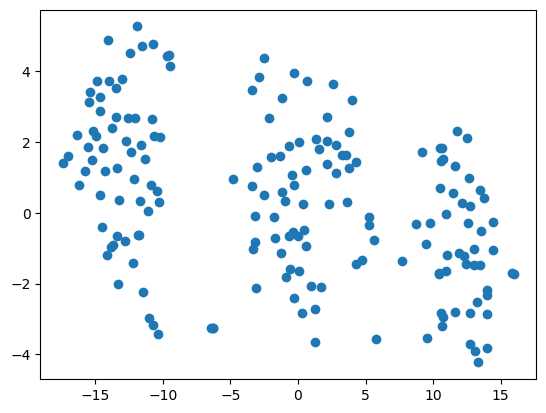

In [92]:
plt.scatter(tsne_pca[:,0],tsne_pca[:,1])

# WITH CLUSTERS OF PC'S DATASET

In [95]:
colorclass=kmeans_pca['labels'].to_numpy()
cluster.tsneplot(score=tsne_pca,colorlist=colorclass,figname='tsne_pca')

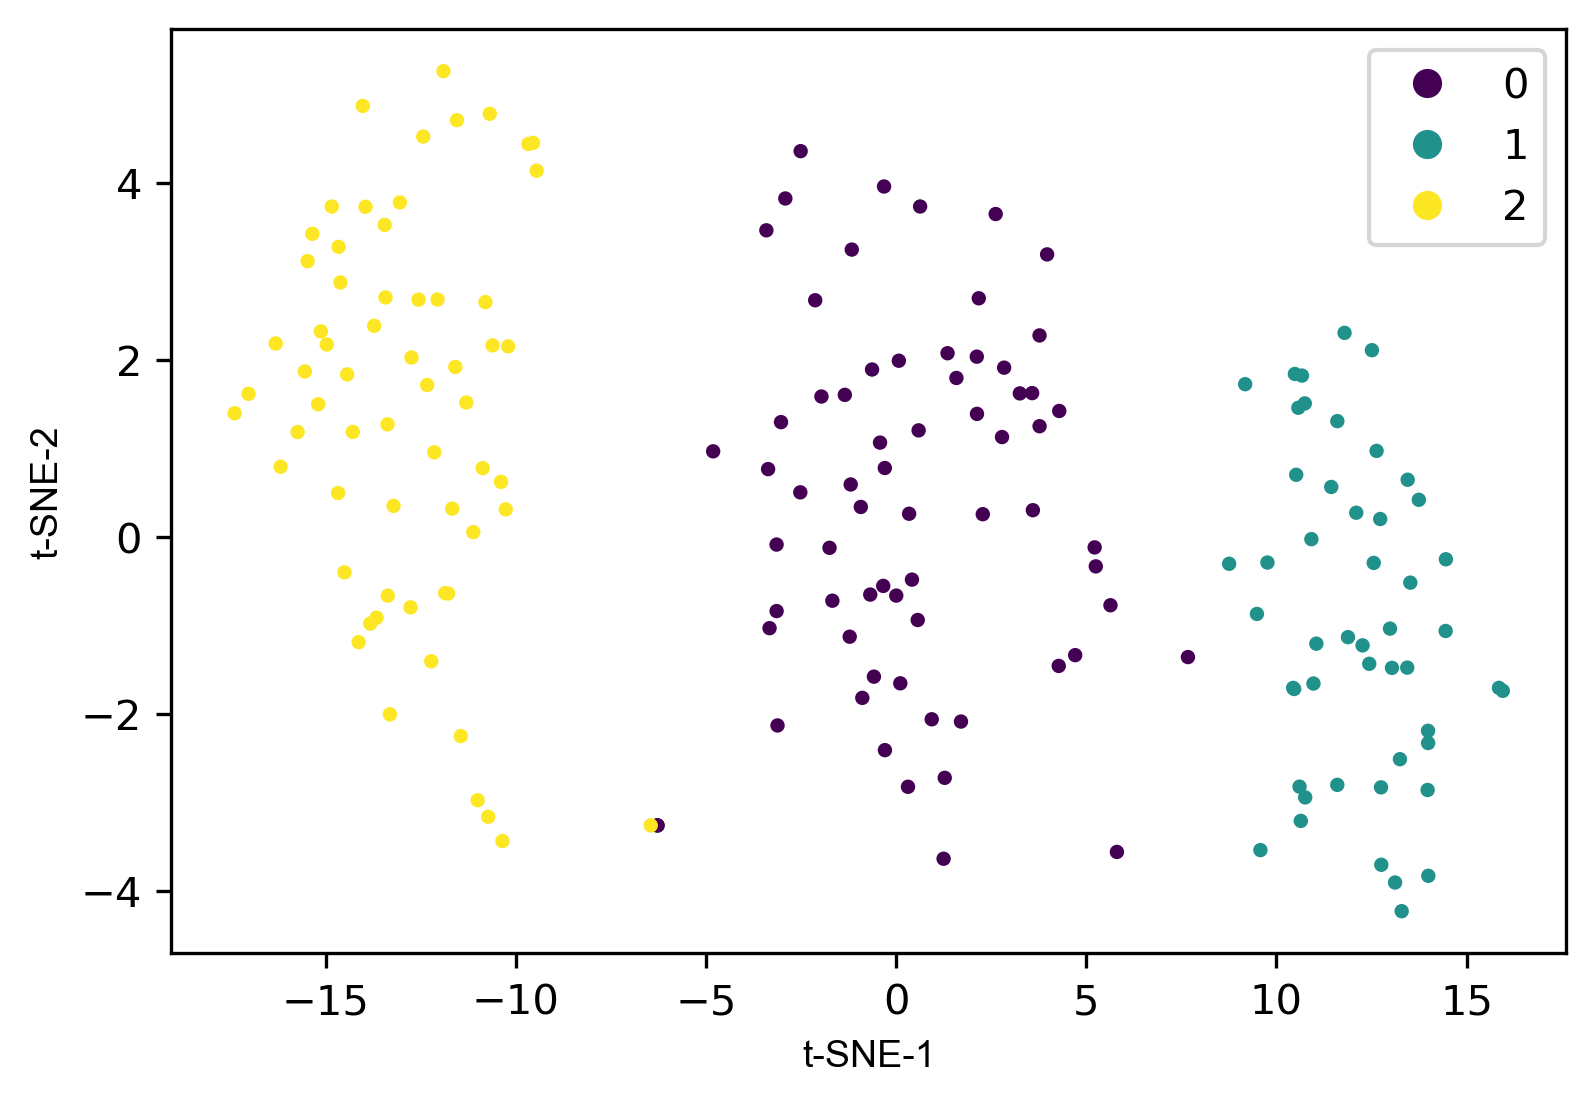

# Comparing the Clustering

# Original Dataset Clustering

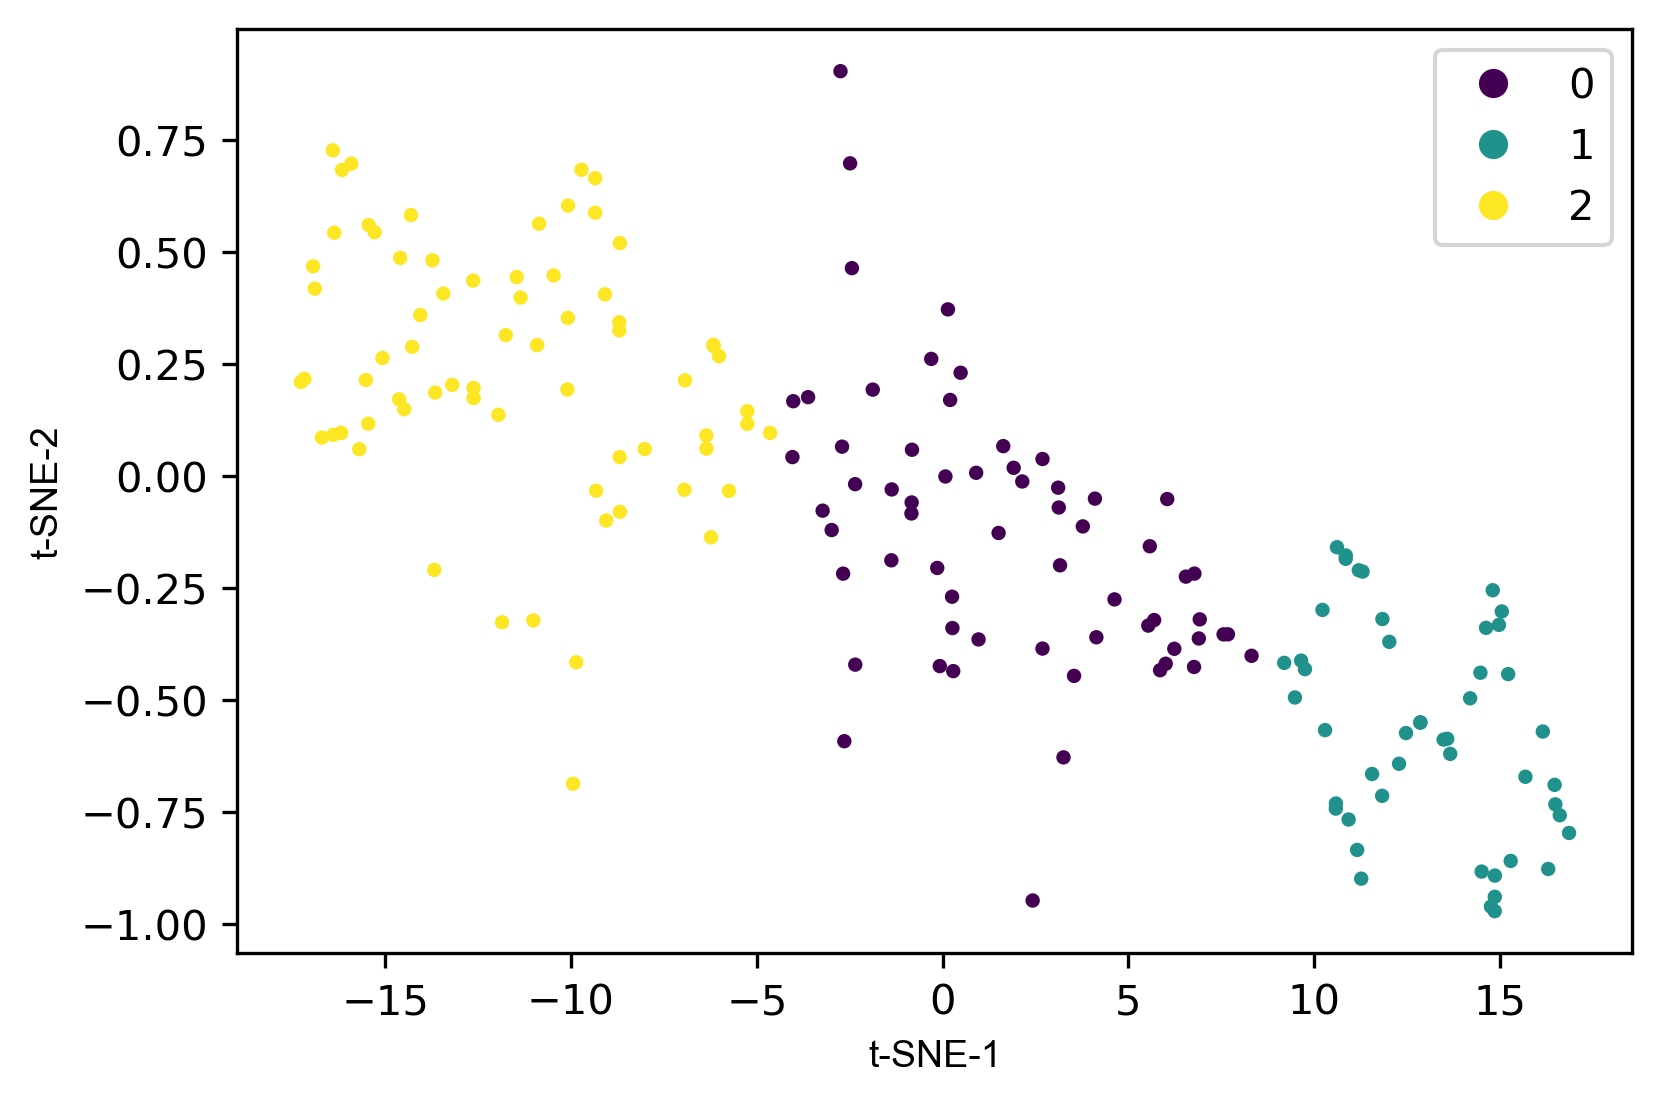

# In Original Dataset Clusteing Inference
# The Clusters are very near to Other Clusters
# The clusters are overlapping with each other
# By Changing some values,there is a chance to jump into another cluster
# The Distance b/w the clusters are very low

# PCA Clustering

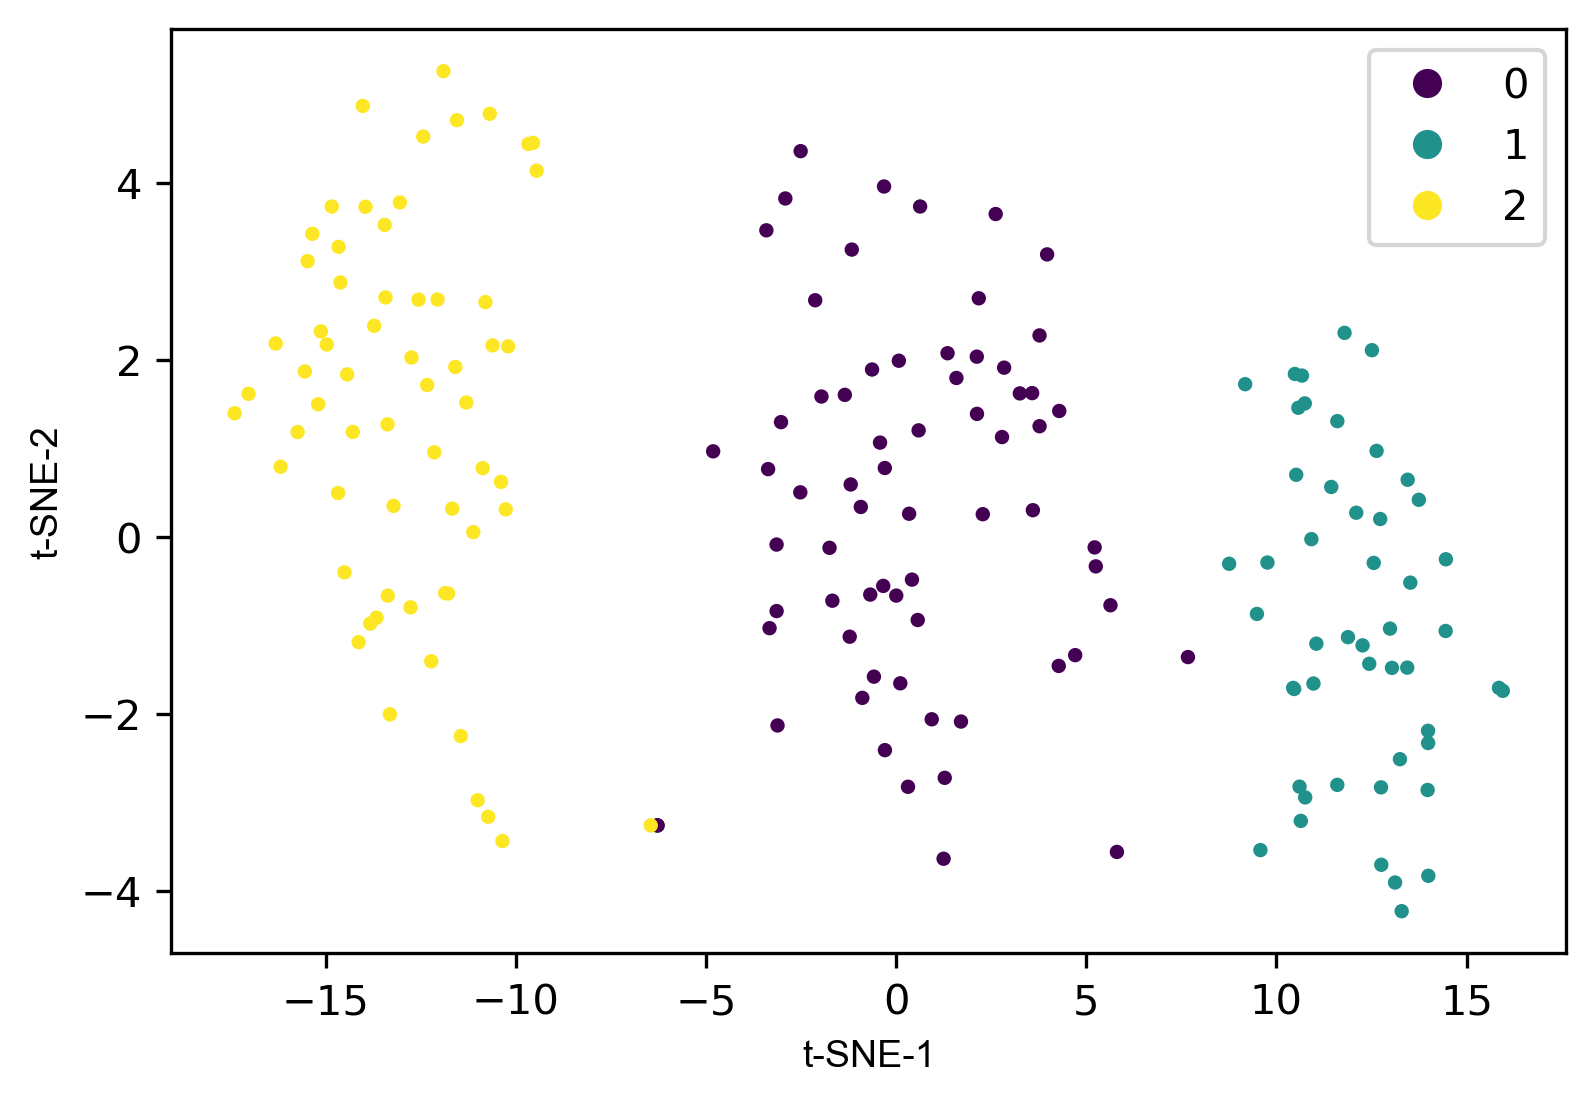

# IN PCA Clustering Inference
# The Clusters are well defined compared to original dataset
# The Clusters very far away from other clusters
# There is no overlapping between the Clusters
# There is less chances that data pt can jump into another cluster by changing the values
# The Distance b/w the Clusters are very high.